## I will give you massPy as a zip - you will have to unzip and `pip install -e massPy`

In [2]:
import sys, os
sys.path.append('python\\plot')
print(os.getcwd())


import massPy as mp
import numpy as np
import matplotlib.pyplot as plt

c:\Users\Simon Andersen\Projects\Projects\Thesis\NematicSimulation\plot


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
def get_dir(Qxx, Qyx, return_S=False):
    """
    get director nx, ny from Order parameter Qxx, Qyx
    """
    S = np.sqrt(Qxx**2+Qyx**2)
    #print(S)
    dx = np.abs(np.sqrt((np.ones_like(S) + Qxx/S)/2))
    #dy = np.sqrt((np.ones_like(S) - Qyx/S)/2)*np.sign(dx)
    #dy = Qyx/(2*s*dx)
    dy = np.sqrt((np.ones_like(S)-Qxx/S)/2)*np.sign(Qyx)
    if return_S:
        return dx, dy, S
    else:
        return dx, dy

In [4]:
path = 'C:\\Users\\Simon Andersen\\Projects\\Projects\\Thesis\\NematicSimulation\\out\\test1'

In [5]:
ar = mp.archive.loadarchive(path)
print(ar.__dict__)

{'_path': WindowsPath('C:/Users/Simon Andersen/Projects/Projects/Thesis/NematicSimulation/out/test1'), '_compress_full': False, '_compress': False, '_ext': '.json', 'LX': 100, 'LY': 100, 'BC': 0, 'nsteps': 1000, 'nsubsteps': 1, 'ninfo': 100, 'nstart': 0, 'model_name': 'nematic', 'angle': 0.0, 'noise': 0.0, 'rho': 40.0, 'Gamma': 0.1, 'xi': 0.1, 'zeta': 0.05, 'tau': 2.0, 'friction': 0.0, 'LL': 0.01, 'CC': 0.1, 'backflow_on': True, 'num_frames': 11}


In [6]:
i =2
frame = ar._read_frame(i)
step=2
LX, LY = frame.LX, frame.LY

Qxx_dat = frame.QQxx.reshape(LX, LY)
Qyx_dat = frame.QQyx.reshape(LX, LY)


dx, dy, S = get_dir(Qxx_dat, Qyx_dat, return_S=True)
vx, vy = mp.base_modules.flow.velocity(frame.ff, LX, LY)

dyux, dxux = np.gradient(vx)
dyuy, dxuy = np.gradient(vy)

vort = dxuy-dyux
E = dxux + dyuy
R = E**2 - vort**2


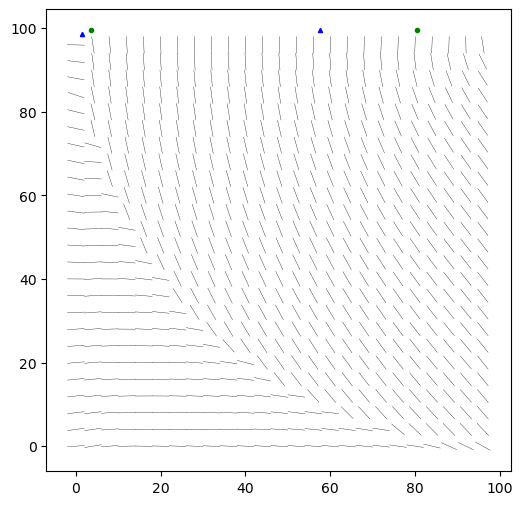

In [7]:
f, s = plt.subplots( figsize=(6,6))
mp.nematic.plot.director(frame, s)
mp.nematic.plot.defects(frame, s)


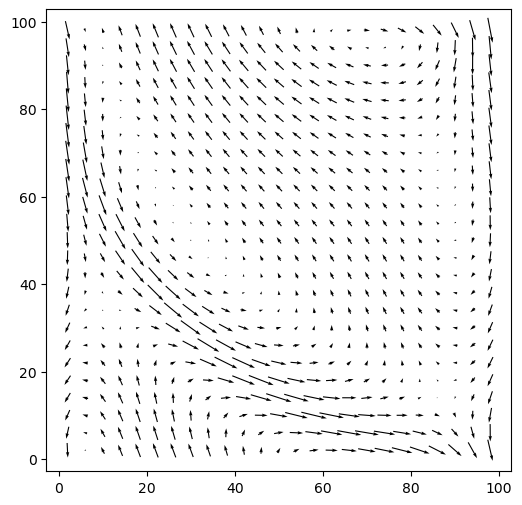

In [8]:
f, s = plt.subplots(figsize = (6,6))
mp.nematic.plot.velocity(frame, s)


In [9]:
import matplotlib.animation as ani
def plot_flow_field(frame, engine = plt):
    mp.nematic.plot.velocity(frame, engine)





In [12]:
defects = mp.nematic.nematicPy.get_defects(Qxx_dat, Qyx_dat, LX, LY)
print(defects[:5])


[{'charge': -0.5, 'pos': [1.5, 98.5]}, {'charge': 0.5, 'pos': [3.5, 99.5]}, {'charge': -0.5, 'pos': [57.5, 99.5]}, {'charge': 0.5, 'pos': [80.5, 99.5]}]


TypeError: list indices must be integers or slices, not str

In [18]:
arr = np.zeros([5,2])
for i, defect in enumerate(defects):
    arr[i] = defect['pos'] 

print(arr)

print(np.ones([5,2]))

[[ 1.5 98.5]
 [ 3.5 99.5]
 [57.5 99.5]
 [80.5 99.5]
 [ 0.   0. ]]
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [11]:
nposdef = len([d for d in defects if d['charge']==0.5])
nnegdef = len([d for d in defects if d['charge']==-0.5])
print(nposdef)
print(nnegdef)
print(len(defects))

2
2
4
